In [1]:
import catboost
import re
import bamboolib as bam
import pandas as pd
import sys

In [2]:
#import bamboolib as bam
import pandas as pd

#df = pd.read_csv(bam.titanic_csv)
df = pd.read_csv("D:/Projects/test/python/Zdrav/raw_Dataset/train.csv")
df

,id,text,label
0,0,"Температура тела : 36,5 С\nВеc, кг : 74 ,\nРос...",0.0
1,1,Педикулез : отр\nЧесотка : отр\nИБС СН 2фк\nДа...,0.0
2,2,"Температура тела : 36,4 С\nВеc, кг : 73 ,\nРос...",0.0
3,3,"Температура тела : 36,4 С\nВеc, кг : 92\nРост,...",0.0
4,4,Педикулез : отр\nЧесотка : отр\nФлюорограмма Н...,0.0
...,...,...,...
79331,79335,Множественная миома матки.\nДата поступления в...,0.0
79332,79336,"Температура тела : 36,5 С\nВеc, кг : 85 ,\nРос...",0.0
79333,79337,Дата начала действия : 01.11.2016\nВид поступл...,0.0
79334,79338,"Код по МКБ10 : G44.1 Сосудистая головная боль,...",0.0


In [3]:
df.head()

,id,text,label
0,0,"Температура тела : 36,5 С\nВеc, кг : 74 ,\nРос...",0.0
1,1,Педикулез : отр\nЧесотка : отр\nИБС СН 2фк\nДа...,0.0
2,2,"Температура тела : 36,4 С\nВеc, кг : 73 ,\nРос...",0.0
3,3,"Температура тела : 36,4 С\nВеc, кг : 92\nРост,...",0.0
4,4,Педикулез : отр\nЧесотка : отр\nФлюорограмма Н...,0.0


In [5]:
new_df = df['text']

In [6]:
new_df[1]

'Педикулез : отр\nЧесотка : отр\nИБС СН 2фк\nДата поступления в приемное отделение : 19.01.2016\nВремя поступления в приемное отделение : 15:33\nГоспитализирован по поводу данного заболевания в текущем году : повторно\nПорядок госпитализации : планово : направившее учреждение : Комитет_здравоохранения Санкт-Петербурга\nСпособ поступления (доставки) : самостоятельно\nЦель поступления : Оперативное_лечение\nКанал поступления: \nНа момент осмотра жалоб не предъявляет\nПовышение АД в течение длительного времени, макс — 180/100 мм рт ст, адаптирован к 130/90 мм рт ст. Гипотензивные препараты принимает регулярно. Клинику стенокардии, ОИМ, ОНМК в анамнезе отрицает. Регулярно наблюдается у кардиолога. Обследован амбулаторно в плановом порядке. По данным ЭХОКГ от 29.12.15г — ФВ- 62%, зон нарушения локальной сократимости ЛЖ не выявлено, гемодинамически значимой клапанной патологии не выявлено.09.11.2015. проведена СТРЕСС-ЭХО-КГ- тест положительный (4,6 МЕТs). Определены показания к проведению КА

In [7]:
PRINT_OUTPUT = False

def printer(*args):
    if PRINT_OUTPUT:
        print(*args)
    else:
        pass

def extract_data(signature):
    result = None
    if not result:
        try:
            s = sample
            last = '\n'
            start = s.index( signature ) + len( signature )
            end = s.index( last, start )
            return s[start:end]
        except ValueError:
            return ""
    else:
        return result

def check_case(data, case):
    if data is not None and len(data) > 1:
        if data.find(case) == -1:
            return 0.0
        else:
            return 1.0
    else: return '<invalid>'

def classify_answer(answ):
    if answ is not None and isinstance(answ, str):
        if len(answ) > 1:
            if 'отрицает' in answ or 'отр' in answ:
                return 0.0
            elif 'первично' in answ:
                return 0.0
            elif 'обычной_окраски' in answ:
                return 0.0
            elif 'без_патологии' in answ:
                return 0.0
            elif 'работает' in answ:
                return 0.0
            elif 'планово' in answ:
                return 0.0
            elif 'правильной_формы' in answ:
                return 0.0
            elif 'не_пальпируется' in answ:
                return 0.0
            elif 'не_участвуют' in answ:
                return 0.0
            elif 'не_слышны' in answ:
                return 0.0
            elif 'лечебно-диагностическая' in answ:
                return 0.0
            elif 'без особенностей' in answ:
                return 0.0
            elif 'самостоятельно' in answ:
                return 0.0
            elif 'не_выражена' in answ:
                return 0.0
            elif 'не_увеличены' in answ:
                return 0.0
            elif 'чистый' in answ:
                return 0.0
            elif 'чистые' in answ:
                return 0.0
            elif 'ясное' in answ:
                return 0.0
            elif 'вступает_легко' in answ:
                return 0.0
            elif 'удовлетворительное' in answ:
                return 0.0
            elif 'удовлетворительно' in answ:
                return 0.0
            elif 'удовлетворительные' in answ:
                return 0.0
            elif 'ориентирован' in answ:
                return 0.0
            elif 'правильное' in answ:
                return 0.0
            elif 'нет' in answ:
                return 0.0
            elif 'не_определяются' in answ:
                return 0.0
            elif 'перианальная область не изменена' in answ:
                return 0.0
            elif 'мягкий' in answ:
                return 0.0
            elif 'безболезненный' in answ:
                return 0.0
            else: return 1.0
        else: return '<invalid>'
    else: return '<invalid>'

def extract_float(answ):
    if answ is not None and len(answ) > 1 and isinstance(answ, str):
        answ = answ.replace(',','.')
        searchMatch = re.findall("\s*\d+.?\d+\s*",answ)
        if searchMatch:
            floatValue = searchMatch[0]
            floatValue = float(floatValue)
            return floatValue
        else:
            return '<invalid>'
    else: return '<invalid>'

In [8]:
from datetime import datetime
start_time = datetime.now()

columns_set=[
         'id',
         'temperatura',
         'ves',
         'rost',
         'pedikulez_status',
         'chesotka_status',
         'flyurogramma',
         'gepatit_status',
         'spid_status',
         'hron_bolezn_pecheni_status',
         'operativnie_vmeshatelstva',
         'perelivanie_krovi_status',
         'kontakti_s_inficirovannimi',
         'prebivanie_zagranicey',
         'lihoradka_status',
         'saharniy_diabet_status',
         'ostr_serdsosudistaya_nedost_status',
         'gepatit_c_status',
         'letal_status',
         'sepsis_status',
         'mas_krovopoterya_status',
         'polip_kishki',
         'gospitalizirovan',
         'poryadok_gosp',
         'sposob_postupleniya',
         'cel_postupleniya',
         'strahov_anamnez',
         'allergologicheskiy_anamnez',
         'vred_privichki',
         'obraz_jizni',
         'obshee_sost',
         'temperatura_utro',
         'temperatura_vecher',
         'soznanie',
         'v_kontakte',
         'emotionalnaya_labilnost',
         'orientacia_v_prostr',
         'teloslojenie',
         'invalidnost',
         'sost_pitaniya',
         'index_massi_tela',
         'ploshad_poverhn_tela',
         'kojnie_pokrovi',
         'skleri_status',
         'vidimie_slizistie',
         'kostno_mishechnaya_sistema',
         'zev',
         'peref_limfouzli',
         'oteki',
         'shitovidnaya_jeleza',
         'selezenka',
         #'serd_sodud_sistema',
         'forma_gr_kletki',
         'chislo_dihaniy',
         'pishevar_sistema',
         'rektalno',
         #'organi_mocheispuscaniya',
         ]
clean_df = pd.DataFrame(columns=columns_set)

id = 0

for i in enumerate(new_df):
    try:
        sample = i[1]

        sample = sample.replace(' : ', ':')
        sample = sample.replace('pattern','')
        sample = sample.lower()

        temperatura = extract_data('температура тела:')
        if len(temperatura) < 1:
            temperatura = extract_data('температура:')
        temperatura = extract_float(temperatura)
        printer("Температура: ", temperatura)

        ves = extract_data('веc:')
        if len(ves) < 1:
            ves = extract_data('веc, кг:')
        ves = extract_float(ves)
        printer("Вес: ", ves)

        rost = extract_data('рост:')
        if len(rost) < 1:
            rost = extract_data('рост, см:')
        rost = extract_float(rost)
        printer("Рост: ", rost)

        pedikulez_status = extract_data('педикулез:')
        pedikulez_status = classify_answer(pedikulez_status)
        printer("Педикулез: ", pedikulez_status)

        chesotka_status = extract_data('чесотка:')
        chesotka_status = classify_answer(chesotka_status)
        printer("Чесотка: ", chesotka_status)

        flyurogramma = extract_data('флюорограмма ')
        flyurogramma = classify_answer(flyurogramma)
        printer("Флюорограмма: ", flyurogramma)

        gepatit_status = extract_data('гепатит ')
        gepatit_status = classify_answer(gepatit_status)
        printer("Гепатит: ", gepatit_status)

        spid_status = extract_data('вич:')
        if len(spid_status) < 1:
            spid_status = extract_data('вич (спид):')
        if len(spid_status) < 1:
            spid_status = check_case(sample, 'b23-инфекция')
        spid_status = classify_answer(spid_status)
        printer("ВИЧ: ", spid_status)

        hron_bolezn_pecheni_status = extract_data('хронические заболевания печени:')
        hron_bolezn_pecheni_status = classify_answer(hron_bolezn_pecheni_status)
        printer("Хронические заболевания печени: ", hron_bolezn_pecheni_status)

        operativnie_vmeshatelstva = extract_data('оперативные вмешательства:')
        operativnie_vmeshatelstva = classify_answer(operativnie_vmeshatelstva)
        printer("Оперативные вмешательства: ", operativnie_vmeshatelstva)

        perelivanie_krovi_status = extract_data('переливание крови:')
        perelivanie_krovi_status = classify_answer(perelivanie_krovi_status)
        printer("Переливание крови: ", perelivanie_krovi_status)

        kontakti_s_inficirovannimi = extract_data('контакты с инфекционными больными:')
        kontakti_s_inficirovannimi = classify_answer(kontakti_s_inficirovannimi)
        printer("Контакты с инфекционными больными: ", kontakti_s_inficirovannimi)

        prebivanie_zagranicey = extract_data('пребывание за границей:')
        prebivanie_zagranicey = classify_answer(prebivanie_zagranicey)
        printer("Пребывание за границей: ", prebivanie_zagranicey)

        lihoradka_status = extract_data('лихорадка:')
        lihoradka_status = classify_answer(lihoradka_status)
        printer("Лихорадка: ", lihoradka_status)

        soznanie = extract_data('сознание ')
        soznanie = classify_answer(soznanie)
        printer("Сознание: ", soznanie)

        v_kontakte = extract_data('в контакт ')
        v_kontakte = classify_answer(v_kontakte)
        printer("В контакте: ", v_kontakte)

        #################################################################################
        saharniy_diabet_status = check_case(sample, 'сахарный диабет ii типа')
        printer("Cахарный диабет II типа: ", saharniy_diabet_status)

        ostr_serdsosudistaya_nedost_status = check_case(sample, 'острая сердечно - сосудистая недостаточность')
        if ostr_serdsosudistaya_nedost_status != 1.0:
            ostr_serdsosudistaya_nedost_status = check_case(sample, 'острая сердечная нед-ть')
        if ostr_serdsosudistaya_nedost_status != 1.0:
            ostr_serdsosudistaya_nedost_status = check_case(sample, 'острая сердечно-сосудистая недостаточность')
        printer('Острая сердечно-сосудистая недостаточность', ostr_serdsosudistaya_nedost_status)

        gepatit_c_status = check_case(sample, 'хронический вирусный гепатит c')
        printer("Cахарный диабет II типа: ", gepatit_c_status)

        letal_status = check_case(sample, 'прогноз крайне неблагоприятный')
        if letal_status != 1:
            letal_status = check_case(sample, 'риск летального исхода')
        if letal_status != 1:
            letal_status = check_case(sample, 'с летальным исходом')
        if letal_status != 1:
            letal_status = check_case(sample, 'возможного летального исхода')
        if letal_status != 1:
            letal_status = check_case(sample, 'возможными исходами манипуляции (включая летальный)')
        if letal_status != 1:
            letal_status = check_case(sample, 'ст 4b прогрессирование')
        if letal_status != 1:
            letal_status = check_case(sample, 'трансплантаци')
        printer("риск летального исхода: ", letal_status)

        sepsis_status = check_case(sample, 'тяжелый сепсис')
        printer("тяжелый сепсис: ", sepsis_status)

        mas_krovopoterya_status = check_case(sample, 'массивной кровопотери')
        if mas_krovopoterya_status != 1.0:
            mas_krovopoterya_status = check_case(sample, 'массивная кровопотеря')
        printer("массивная кровопотеря: ", mas_krovopoterya_status)

        if ostr_serdsosudistaya_nedost_status > 0 or gepatit_c_status > 0 or letal_status  > 0 or sepsis_status or mas_krovopoterya_status > 0:
            letal_status = 1
        else:
            letal_status = 0

        # or lihoradka_status > 0 or soznanie > 0 or v_kontakte > 0
        print("риск летального исхода: ", letal_status)
        #################################################################################

        polip_kishki = check_case(sample, 'полип ободочной')
        if polip_kishki != 1.0:
            polip_kishki = check_case(sample, 'полипы кишки')
        if polip_kishki != 1.0:
            polip_kishki = check_case(sample, 'полипы желудка')
        printer("Полипы: ", polip_kishki)

        gospitalizirovan = extract_data('госпитализирован по поводу данного заболевания в текущем году:')
        gospitalizirovan = classify_answer(gospitalizirovan)
        printer("Госпитализирован по поводу данного заболевания в текущем году: ", gospitalizirovan)

        poryadok_gosp = extract_data('порядок госпитализации:')
        poryadok_gosp = classify_answer(poryadok_gosp)
        printer("Порядок госпитализации: ",poryadok_gosp)

        sposob_postupleniya = extract_data('способ поступления (доставки):')
        if len(sposob_postupleniya) < 1:
            sposob_postupleniya = extract_data('способ поступления:')
            if len(sposob_postupleniya) < 1:
                sposob_postupleniya = extract_data('способ транспортировки:')
        sposob_postupleniya = classify_answer(sposob_postupleniya)
        printer("Способ поступления: ", sposob_postupleniya)

        cel_postupleniya = extract_data('цель поступления:')
        cel_postupleniya = classify_answer(cel_postupleniya)
        printer("Цель поступления: ", cel_postupleniya)

        strahov_anamnez = extract_data('страховой анамнез:')
        strahov_anamnez = classify_answer(strahov_anamnez)
        printer("Страховой анамнез: ", strahov_anamnez)

        allergologicheskiy_anamnez = extract_data('аллергологический анамнез:')
        allergologicheskiy_anamnez = classify_answer(allergologicheskiy_anamnez)
        printer("Аллергологический анамнез: ", allergologicheskiy_anamnez)

        vred_privichki = extract_data('вредные привычки:')
        vred_privichki = classify_answer(vred_privichki)
        printer("Вредные привычки: ", vred_privichki)

        obraz_jizni = extract_data('образ жизни:')
        obraz_jizni = classify_answer(obraz_jizni)
        printer("Образ жизни: ", obraz_jizni)

        obshee_sost = extract_data('общее состояние ')
        obshee_sost = classify_answer(obshee_sost)
        printer("Общее состояние: ",obshee_sost)

        temperatura_utro = extract_data('температура тела:утро:') # 36,6 ; вечер:36,6
        temperatura_utro = extract_float(temperatura_utro)
        printer("Температура тела : утро: ", temperatura_utro)

        temperatura_vecher = extract_data('температура тела:утро:36,6 ; вечер:')
        temperatura_vecher = extract_float(temperatura_vecher)
        printer("Температура тела : вечер: ", temperatura_vecher)

        emotionalnaya_labilnost = extract_data('эмоциональная лабильность ')
        emotionalnaya_labilnost = classify_answer(emotionalnaya_labilnost)
        printer("Эмоциональная лабильность: ", emotionalnaya_labilnost)

        orientacia_v_prostr = extract_data('в пространстве и времени ')
        orientacia_v_prostr = classify_answer(orientacia_v_prostr)
        printer("Ориентация в пространстве и времени: ", orientacia_v_prostr)

        teloslojenie = extract_data('телосложение ')
        teloslojenie = classify_answer(teloslojenie)
        printer("Телосложение: ", teloslojenie)

        invalidnost = extract_data('инвалидность  ')
        invalidnost = classify_answer(invalidnost)
        printer("Инвалидность: ", teloslojenie)

        sost_pitaniya = extract_data('состояние питания ')
        sost_pitaniya = classify_answer(sost_pitaniya)
        printer("Состояние питания: ", sost_pitaniya)

        index_massi_tela = extract_data('индекс массы тела ')
        index_massi_tela = extract_float(index_massi_tela)
        printer("Индекс массы тела: ", index_massi_tela)

        ploshad_poverhn_tela = extract_data('площадь поверхности тела ')
        ploshad_poverhn_tela = extract_float(ploshad_poverhn_tela)
        printer("Площадь поверхности тела: ", ploshad_poverhn_tela)

        kojnie_pokrovi = extract_data('кожные покровы ')
        kojnie_pokrovi = classify_answer(kojnie_pokrovi)
        printer("Кожные покровы: ", kojnie_pokrovi)

        skleri_status = extract_data('склеры ')
        skleri_status = classify_answer(skleri_status)
        printer("Склеры: ", skleri_status)

        vidimie_slizistie = extract_data('видимые слизистые оболочки ')
        vidimie_slizistie = classify_answer(vidimie_slizistie)
        printer("Видимые слизистые оболочки: ", vidimie_slizistie)

        kostno_mishechnaya_sistema = extract_data('костно-мышечная система ')
        kostno_mishechnaya_sistema = classify_answer(kostno_mishechnaya_sistema)
        printer("Костно-мышечная система: ", kostno_mishechnaya_sistema)

        zev = extract_data('зев ')
        zev = classify_answer(zev)
        printer("Зев: ", zev)

        peref_limfouzli = extract_data('периферические лимфоузлы:')
        peref_limfouzli = classify_answer(peref_limfouzli)
        printer("gериферические лимфоузлы: ", peref_limfouzli)

        oteki = extract_data('отеки:')
        oteki = classify_answer(oteki)
        printer("Отеки: ", oteki)

        shitovidnaya_jeleza = extract_data('щитовидная железа:')
        shitovidnaya_jeleza = classify_answer(shitovidnaya_jeleza)
        printer("щитовидная железа: ", shitovidnaya_jeleza)

        selezenka = extract_data('cелезенка ')
        if len(selezenka) < 1:
            selezenka = extract_data('cелезенка:')
        selezenka = classify_answer(selezenka)
        printer("Селезенка: ", selezenka)

        # serd_sodud_sistema = extract_data('сердечно-сосудистая система:')
        # print(serd_sodud_sistema)

        forma_gr_kletki = extract_data('Грудная клетка ')
        forma_gr_kletki = classify_answer(forma_gr_kletki)
        printer(forma_gr_kletki)

        chislo_dihaniy = extract_data('число дыханий в 1 мин.')
        chislo_dihaniy = extract_float(chislo_dihaniy)
        printer("число дыханий в 1 мин: ", chislo_dihaniy)

        pishevar_sistema = extract_data('пищеварительная система:')
        pishevar_sistema = classify_answer(pishevar_sistema)
        printer("Пищеварительная система: ", pishevar_sistema)

        rektalno = extract_data('ректально:')
        rektalno = classify_answer(rektalno)
        printer("Ректально: ", rektalno)

        organi_mocheispuscaniya = extract_data('органы мочеиспускания:')
        printer(organi_mocheispuscaniya)

        diagnoz_osnovnoy = extract_data('диагноз уточненный_основной:')
        printer("диагноз уточненный_основной: ", diagnoz_osnovnoy)

        diagnoz_kod = extract_data('код по мкб10:')
        printer("Код по МКБ10: ", diagnoz_kod)

        diagnoz_osnovnoy = extract_data('диагноз_поступления_основной:')
        printer("ДИАГНОЗ_ПОСТУПЛЕНИЯ_ОСНОВНОЙ: ", diagnoz_osnovnoy)

        diagnoz_opisanie = extract_data('nnnnnnnnn,')
        printer("ДИАГНОЗ_ОПИСАНИЕ_ОСНОВНОЙ: ", diagnoz_opisanie)

        print('===' * 40)
        print(id)
        print('===' * 40)

        clean_df = clean_df.append(pd.DataFrame({
            'id':id,
            'temperatura':temperatura,
            'ves':ves,
            'rost':rost,
            'pedikulez_status':pedikulez_status,
            'chesotka_status':chesotka_status,
            'flyurogramma':flyurogramma,
            'gepatit_status':gepatit_status,
            'spid_status':spid_status,
            'hron_bolezn_pecheni_status':hron_bolezn_pecheni_status,
            'operativnie_vmeshatelstva':operativnie_vmeshatelstva,
            'perelivanie_krovi_status':perelivanie_krovi_status,
            'kontakti_s_inficirovannimi':kontakti_s_inficirovannimi,
            'prebivanie_zagranicey':prebivanie_zagranicey,
            'lihoradka_status':lihoradka_status,
            'saharniy_diabet_status':saharniy_diabet_status,
            'ostr_serdsosudistaya_nedost_status':ostr_serdsosudistaya_nedost_status,
            'gepatit_c_status':gepatit_c_status,
            'letal_status':letal_status,
            'sepsis_status':sepsis_status,
            'mas_krovopoterya_status':mas_krovopoterya_status,
            'polip_kishki':polip_kishki,
            'gospitalizirovan':gospitalizirovan,
            'poryadok_gosp':poryadok_gosp,
            'sposob_postupleniya':sposob_postupleniya,
            'cel_postupleniya':cel_postupleniya,
            'strahov_anamnez':strahov_anamnez,
            'allergologicheskiy_anamnez':allergologicheskiy_anamnez,
            'vred_privichki':vred_privichki,
            'obraz_jizni':obraz_jizni,
            'obshee_sost':obshee_sost,
            'temperatura_utro':temperatura_utro,
            'temperatura_vecher':temperatura_vecher,
            'soznanie':soznanie,
            'v_kontakte':v_kontakte,
            'emotionalnaya_labilnost':emotionalnaya_labilnost,
            'orientacia_v_prostr':orientacia_v_prostr,
            'teloslojenie':teloslojenie,
            'invalidnost':invalidnost,
            'sost_pitaniya':sost_pitaniya,
            'index_massi_tela':index_massi_tela,
            'ploshad_poverhn_tela':ploshad_poverhn_tela,
            'kojnie_pokrovi':kojnie_pokrovi,
            'skleri_status':skleri_status,
            'vidimie_slizistie':vidimie_slizistie,
            'kostno_mishechnaya_sistema':kostno_mishechnaya_sistema,
            'zev':zev,
            'peref_limfouzli':peref_limfouzli,
            'oteki':oteki,
            'shitovidnaya_jeleza':shitovidnaya_jeleza,
            'selezenka':selezenka,
            #'serd_sodud_sistema':serd_sodud_sistema,
            'forma_gr_kletki':forma_gr_kletki,
            'chislo_dihaniy':chislo_dihaniy,
            'pishevar_sistema':pishevar_sistema,
            'rektalno':rektalno,
            #'organi_mocheispuscaniya':organi_mocheispuscaniya,
        }, index=[id]), ignore_index=False)

        id += 1
        if id == 5000:#len(df.index):
            break
    except:
        print("Ошибка при обработке данных о пациенте, продолжаем...")

time_elapsed = datetime.now() - start_time
print('Всего времени затрачено на обработку (hh:mm:ss) {}'.format(time_elapsed))

риск летального исхода:  0
0
риск летального исхода:  0
1
риск летального исхода:  0
2
риск летального исхода:  0
3
риск летального исхода:  0
4
риск летального исхода:  0
5
риск летального исхода:  0
6
риск летального исхода:  0
7
риск летального исхода:  0
8
риск летального исхода:  0
9
риск летального исхода:  0
10
риск летального исхода:  0
11
риск летального исхода:  0
12
риск летального исхода:  0
13
риск летального исхода:  0
14
риск летального исхода:  0
15
риск летального исхода:  0
16
риск летального исхода:  0
17
риск летального исхода:  0
18
риск летального исхода:  0
19
риск летального исхода:  0
20
риск летального исхода:  0
21
риск летального исхода:  0
22
риск летального исхода:  0
23
риск летального исхода:  0
24
риск летального исхода:  0
25
риск летального исхода:  0
26
риск летального исхода:  0
27
риск летального исхода:  0
28
риск летального исхода:  0
29
риск летального исхода:  0
30
риск летального исхода:  0
31
риск летального исхода:  0
32
риск летального исхо

In [9]:
clean_df = clean_df.replace(['<invalid>'], '0.0')
clean_df

,id,temperatura,ves,rost,pedikulez_status,chesotka_status,flyurogramma,gepatit_status,spid_status,hron_bolezn_pecheni_status,...,kostno_mishechnaya_sistema,zev,peref_limfouzli,oteki,shitovidnaya_jeleza,selezenka,forma_gr_kletki,chislo_dihaniy,pishevar_sistema,rektalno
0,0,36.5,74,176,0,0,0,0,0.0,0,...,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0,0,1,0.0,0.0,15,0,0.0
2,2,36.4,73,174,0,0,0,0,0,0,...,0,0,0,0,1,0.0,0.0,16,0,0.0
3,3,36.4,92,165,0,0,0,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0,0,0,0,0.0,0,...,0.0,0.0,0,0,1,0.0,0.0,12,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,36.5,0.0,0.0,0,0,1,0,0,0,...,0,0,0,0,1,0.0,0.0,15,0,0.0
4996,4996,36.6,162,72,0,0,0,0,0,0,...,0,0,0,1,1,0.0,0.0,18,0,0.0
4997,4997,36.6,70,167,0,0,1,0,0,0,...,0,0,0,0,1,0.0,0.0,16,0,0.0
4998,4998,36.5,67,167,0,0,1,0,0,0,...,0,0,0,0,1,0.0,0.0,17,0,0.0


In [10]:
clean_df.to_csv("processed.csv", sep=',', encoding='utf-8')

In [11]:
clean_df.describe()

,id,saharniy_diabet_status,ostr_serdsosudistaya_nedost_status,gepatit_c_status,letal_status,sepsis_status,mas_krovopoterya_status,polip_kishki
count,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.0,5000.0,5000.000000
mean,2499.500000,0.152400,0.0,0.000400,0.044400,0.0,0.0,0.001800
std,1443.520003,0.359444,0.0,0.019998,0.206003,0.0,0.0,0.042392
min,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
25%,1249.750000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
50%,2499.500000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
75%,3749.250000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
max,4999.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000


In [12]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  5000 non-null   int64  
 1   temperatura                         5000 non-null   object 
 2   ves                                 5000 non-null   object 
 3   rost                                5000 non-null   object 
 4   pedikulez_status                    5000 non-null   object 
 5   chesotka_status                     5000 non-null   object 
 6   flyurogramma                        5000 non-null   object 
 7   gepatit_status                      5000 non-null   object 
 8   spid_status                         5000 non-null   object 
 9   hron_bolezn_pecheni_status          5000 non-null   object 
 10  operativnie_vmeshatelstva           5000 non-null   object 
 11  perelivanie_krovi_status            5000 no

In [13]:
clean_df.groupby(letal_status['letal_status']).size()

TypeError: 'int' object is not subscriptable

In [14]:
y = clean_df['letal_status'].values

features_to_drop = ['letal_status','id']

cutted = clean_df.drop(features_to_drop,axis=1)
X = cutted.values

In [15]:
import os
import pandas as pd
import numpy as np
import pickle
# import pefile
import sklearn.ensemble as ek
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [30]:
extratrees = ek.ExtraTreesClassifier(n_estimators=300).fit(X,y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
nbfeatures = X_new.shape[1]
nbfeatures

17

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25)

In [32]:
features = []
index = np.argsort(extratrees.feature_importances_)[::-1][:nbfeatures]

In [33]:
for f in range(nbfeatures):
    print("%d. feature %s (%f)" % (f, cutted.columns[index[f]], 10 * extratrees.feature_importances_[index[f]]))
    features.append(cutted.columns[index[f]])

0. feature ploshad_poverhn_tela (1.193250)
1. feature index_massi_tela (1.133674)
2. feature rost (0.839391)
3. feature ves (0.809485)
4. feature chislo_dihaniy (0.672545)
5. feature temperatura (0.624608)
6. feature vred_privichki (0.609218)
7. feature flyurogramma (0.363260)
8. feature operativnie_vmeshatelstva (0.273330)
9. feature obshee_sost (0.270203)
10. feature temperatura_utro (0.254607)
11. feature allergologicheskiy_anamnez (0.253951)
12. feature cel_postupleniya (0.245075)
13. feature hron_bolezn_pecheni_status (0.227459)
14. feature gospitalizirovan (0.204239)
15. feature vidimie_slizistie (0.197696)
16. feature gepatit_status (0.191680)


In [34]:
fti = extratrees.feature_importances_
for i, feat in enumerate(features):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

	ploshad_poverhn_tela : 0.062461
	index_massi_tela     : 0.080948
	rost                 : 0.083939
	ves                  : 0.000000
	chislo_dihaniy       : 0.000000
	temperatura          : 0.036326
	vred_privichki       : 0.019168
	flyurogramma         : 0.000257
	operativnie_vmeshatelstva : 0.022746
	obshee_sost          : 0.027333
	temperatura_utro     : 0.012434
	allergologicheskiy_anamnez : 0.000819
	cel_postupleniya     : 0.001494
	hron_bolezn_pecheni_status : 0.009861
	gospitalizirovan     : 0.015318
	vidimie_slizistie    : 0.000000
	gepatit_status       : 0.008346


In [35]:
model = {"DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
    "RandomForest":ek.RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'auto', n_estimators = 200),
    #"Adaboost":ek.AdaBoostClassifier(n_estimators=50),
    "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
    #"GNB":GaussianNB(),
    "LinearRegression":LinearRegression()
}

In [27]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

DecisionTree : 0.956 
RandomForest : 0.9672 
GradientBoosting : 0.964 
LinearRegression : 0.046745687309469264 


In [36]:
winner = max(results, key=results.get)
print ("Using %s" %(model[winner]))

Using RandomForestClassifier(max_depth=7, n_estimators=200)


In [37]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))

0.9853333333333333


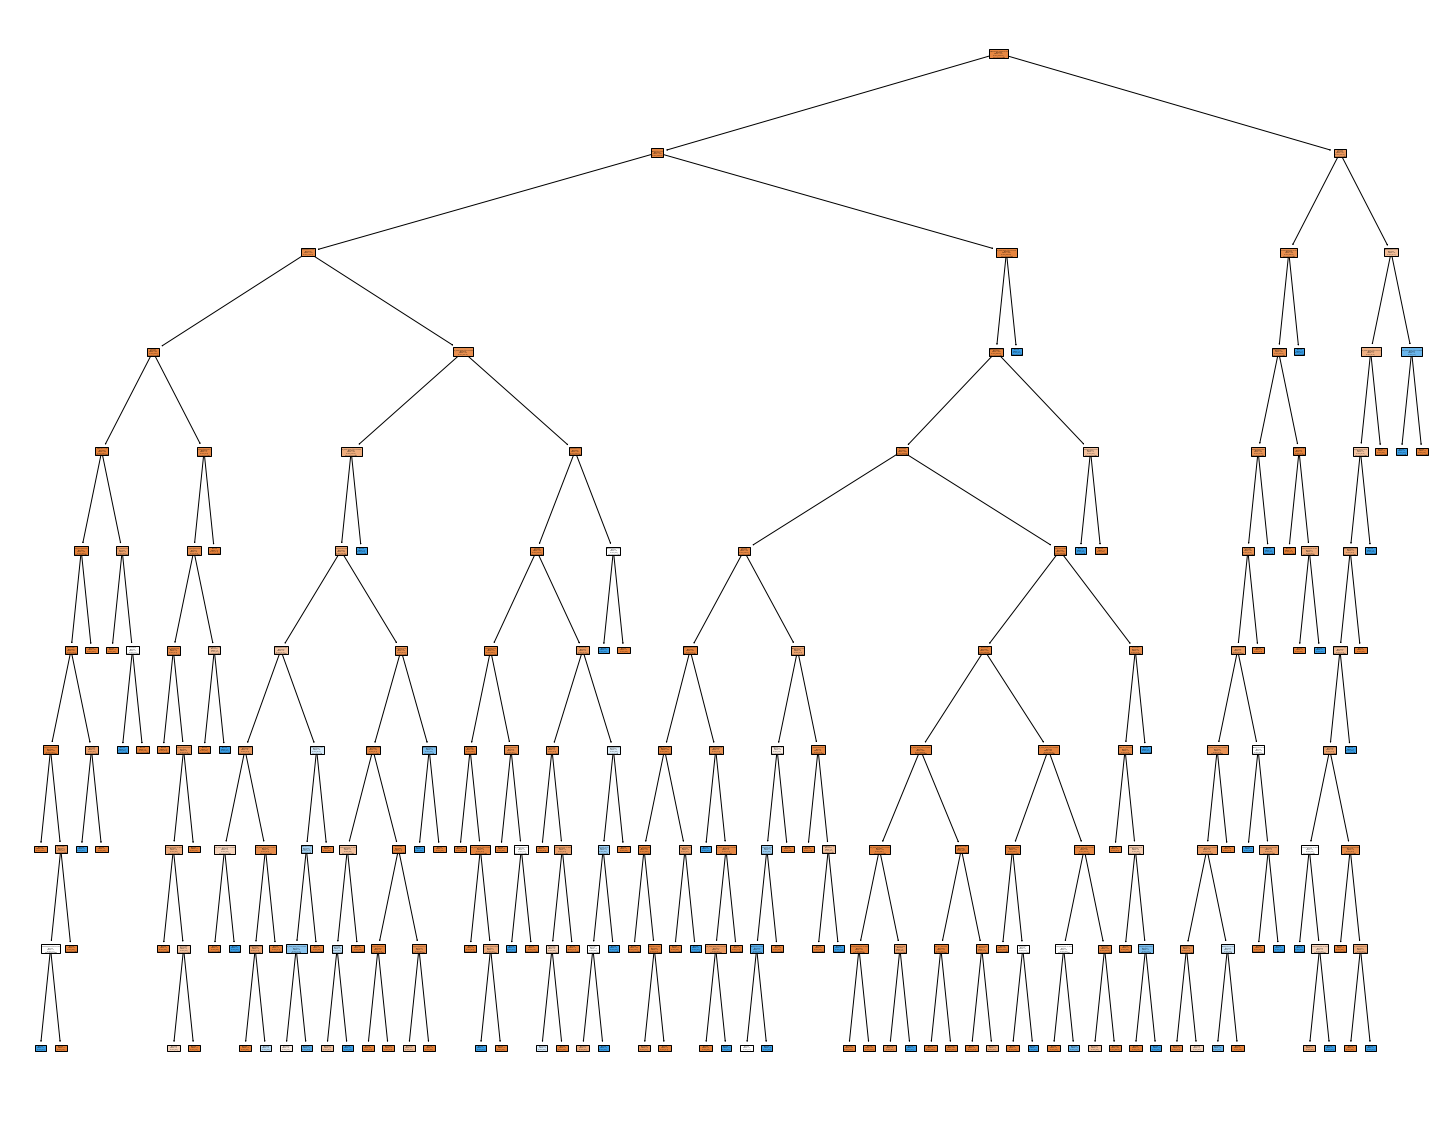

In [38]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=features,
                   class_names=['Не летальный', "Летальный"],
                   filled=True)
fig.savefig('features_graph.png')

In [39]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.9853333333333333


array([[3582,   11],
       [  44,  113]], dtype=int64)

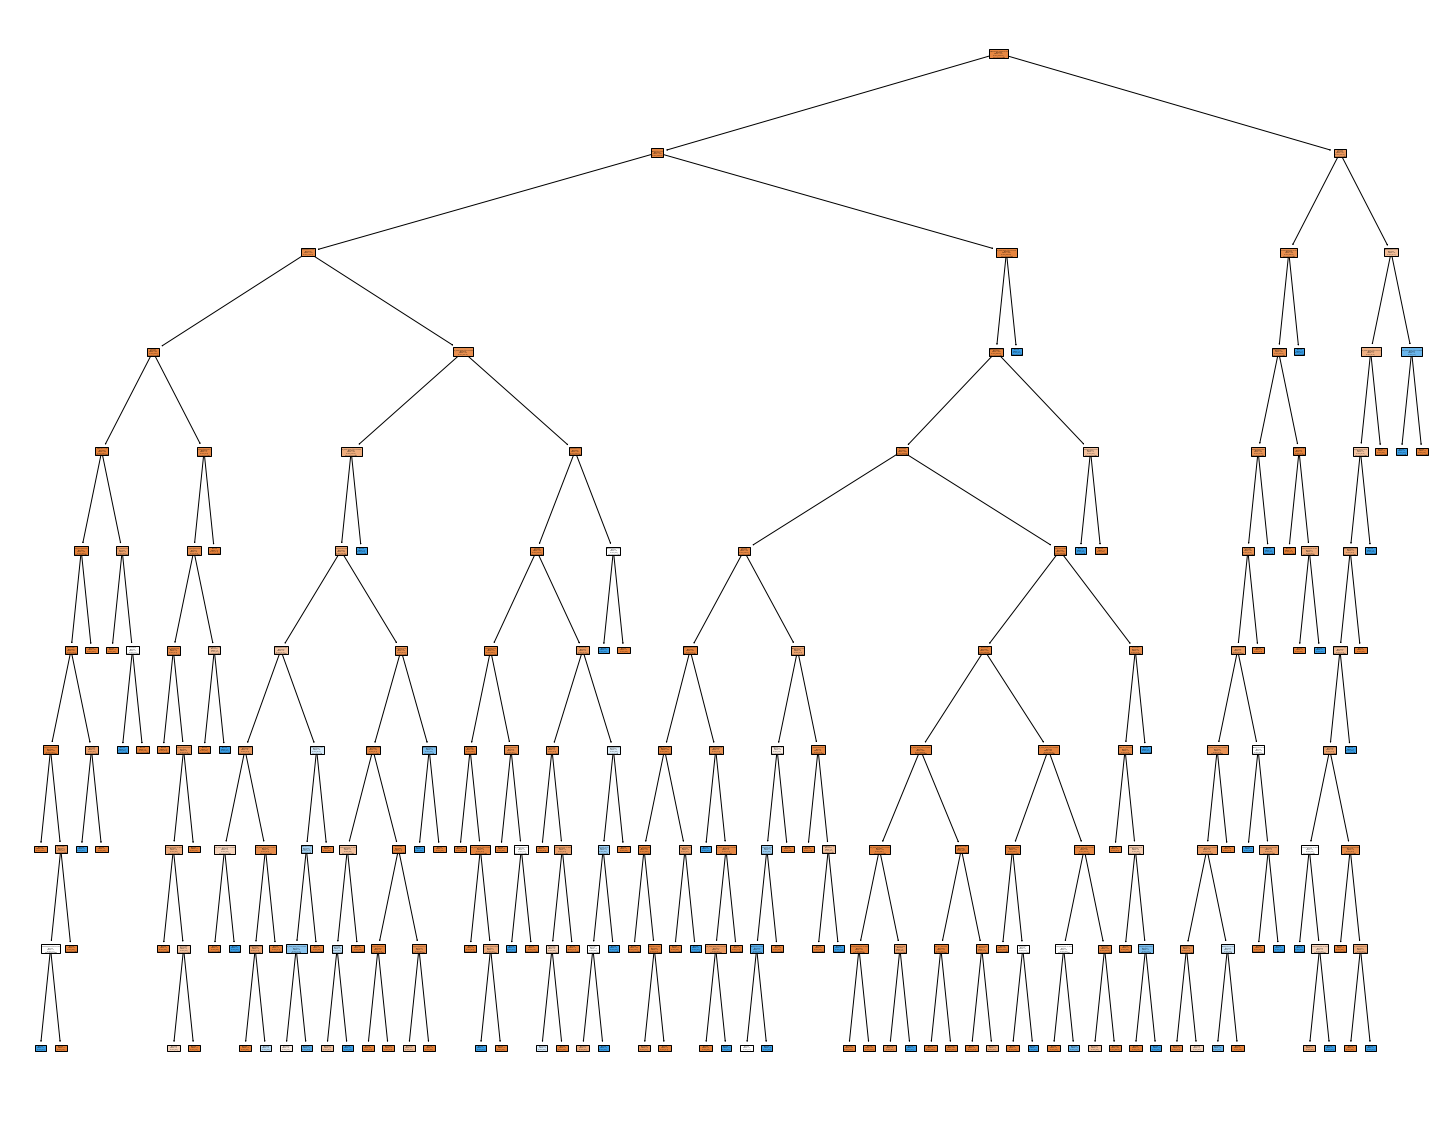

In [41]:
def get_dt_graph(clf):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(clf,
                       feature_names=features,
                       class_names=['Не летальный', "Летальный"],
                       filled=True)

gph = get_dt_graph(clf)

In [42]:
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = features,
                     class_names=['Не летальный', "Летальный"],
                     filled = True)

In [43]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [44]:
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y)
print(result)

AttributeError: 'dict' object has no attribute 'score'